In [287]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas import DataFrame, read_csv
from sklearn import metrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from math import sqrt

%matplotlib inline

In [288]:
%matplotlib notebook

In [289]:
project = 'house-prices'
version='v0.1'

In [290]:
fulltrain=read_csv('./train.csv',index_col=0)
test=read_csv('./test.csv',index_col=0)

In [291]:
fixed_seed=1234578416
train80, valid20 = train_test_split(fulltrain, test_size=0.2, random_state=fixed_seed)

In [292]:
train80.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
177,60,RL,97.0,10029,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,9,2007,WD,Normal,211000
148,60,RL,NaN,9505,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,222500
1229,120,RL,65.0,8769,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,10,2008,New,Partial,367294
1085,60,RL,NaN,13031,Pave,NaN,IR2,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,187500
160,60,RL,134.0,19378,Pave,NaN,IR1,HLS,AllPub,Corner,...,0,NaN,NaN,NaN,0,3,2006,New,Partial,320000


In [293]:
train80 = train80.fillna(0)
valid20 = valid20.fillna(0)

In [294]:
for df in [train80, valid20]:
    for column in df.columns:
        if column not in ['TotalBsmtSF','GarageArea','GarageCars','OverallQual','GrLivArea', 'LotArea', 'SalePrice']:
            df.drop(column, axis=1, inplace=True)

In [295]:
train80 = train80.loc[train80['GarageArea']!=0]
valid20 = valid20.loc[valid20['GarageArea']!=0]

In [296]:
train80.columns

Index(['LotArea', 'OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')

In [297]:
target_column='SalePrice'
X_train = train80.drop(target_column, axis=1).values
y_train = train80[target_column].values
X_val = valid20.drop(target_column, axis=1).values
y_val = valid20[target_column].values

In [298]:
reg = LinearRegression().fit(X_train, y_train)

In [299]:
y_val_pred = reg.predict(X_val)
y_val_pred = y_val_pred.clip(1)

In [300]:
reg.score(X_train, y_train)

0.773493798768833

In [301]:
reg.score(X_val, y_val)

0.6896343440319513

In [302]:
diff = np.log(y_val)-np.log(y_val_pred)
log_RMSE = sqrt((diff*diff).mean())
log_RMSE

0.1886733568938026

<IPython.core.display.Javascript object>


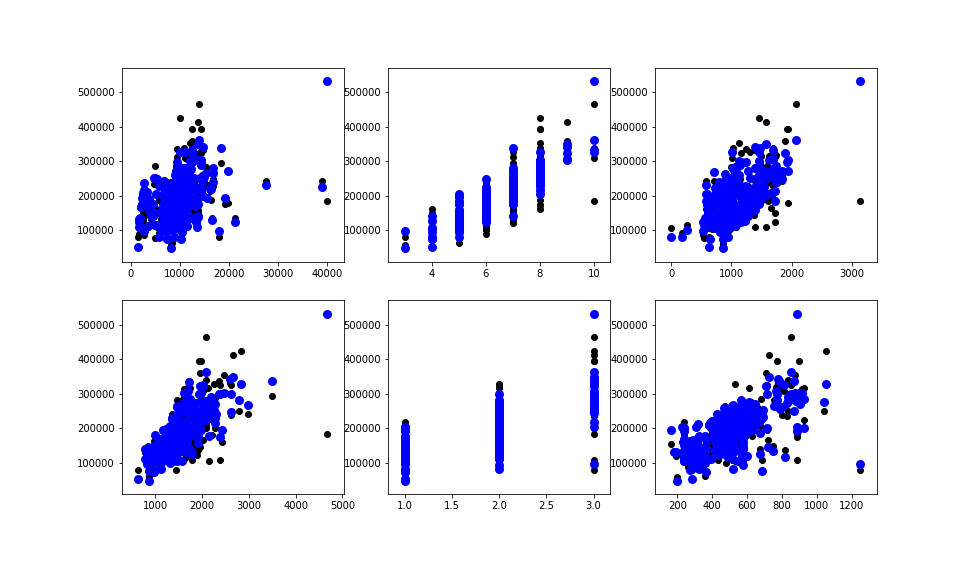

In [320]:
fig = plt.figure()
for i in range(0,train80.shape[1]-1):
    plt.subplot(2,3,i+1)
    plt.scatter(X_val[:,i], y_val,  color='black')
    plt.scatter(X_val[:,i], y_val_pred, color='blue', linewidth=3)

plt.show()

<IPython.core.display.Javascript object>


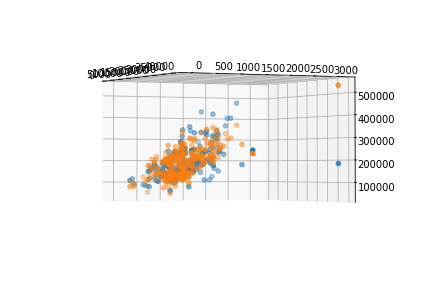

In [323]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(X_val[:,0], X_val[:,2], y_val)
ax.scatter(X_val[:,0], X_val[:,2], y_val_pred)
fig.show()

<IPython.core.display.Javascript object>


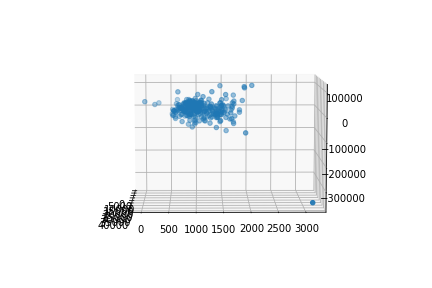

In [325]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(X_val[:,0], X_val[:,2], y_val- y_val_pred)

fig.show()